<div style="color: red;"> Damien TANNEAU, e1801969, M1 IM, 2022-2023</div>

# Librairies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Imports des données

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


# Analyse des données

Chercons à présent à en savoir plus sur les données.

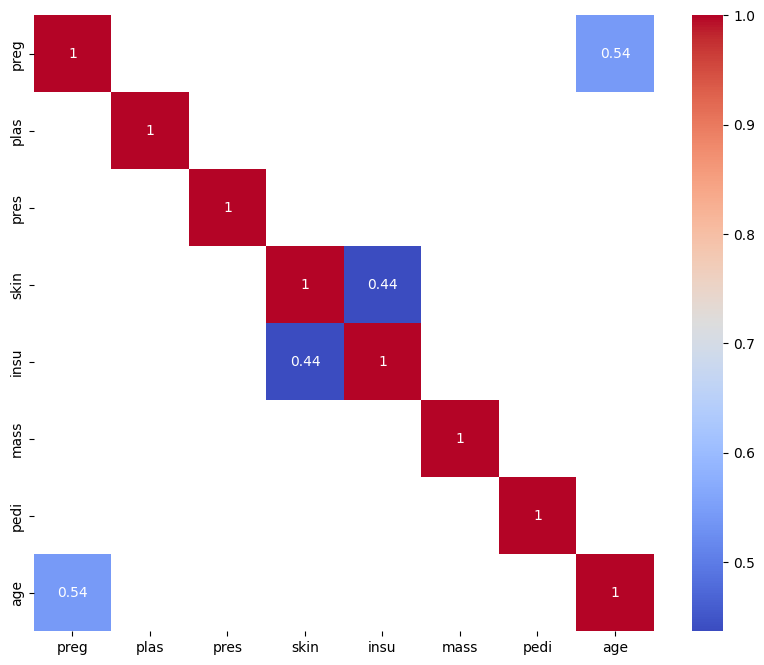

Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.9510 - accuracy: 0.6075
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.8555 - accuracy: 0.5912
Epoch 3/10
39/39 [==============================] - 0s 1ms/step - loss: 0.8445 - accuracy: 0.6107
Epoch 4/10
39/39 [==============================] - 0s 1ms/step - loss: 0.7406 - accuracy: 0.5798
Epoch 5/10
39/39 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.6091
Epoch 6/10
39/39 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.6515
Epoch 7/10
39/39 [==============================] - 0s 974us/step - loss: 0.7582 - accuracy: 0.6059
Epoch 8/10
39/39 [==============================] - 0s 985us/step - loss: 0.6216 - accuracy: 0.6759
Epoch 9/10
39/39 [==============================] - 0s 935us/step - loss: 0.6661 - accuracy: 0.6726
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.7078
Loss: 0.5893903

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import tensorflow as tf

# Charger les données
df = pd.read_csv("diabetes.csv")

# Sélectionner uniquement les variables numériques
numeric_features = df.select_dtypes(include=np.number)

# Calculer la matrice de corrélation des variables numériques
correlation_matrix = numeric_features.corr().abs()

# Sélectionner les coefficients de corrélation absolus supérieurs à 0.7
high_corr_features = correlation_matrix[correlation_matrix > 0.4]

# Afficher la matrice de corrélation avec les coefficients sélectionnés sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_features, annot=True, cmap="coolwarm")
plt.show()

# Séparer les caractéristiques et les étiquettes
features = df.drop("class", axis=1)
labels = df["class"]

# Encoder les étiquettes en valeurs numériques
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Appliquer le test du Chi2 pour sélectionner les meilleures caractéristiques
best_features = SelectKBest(score_func=chi2, k=5).fit_transform(features, labels)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(best_features, labels, test_size=0.2, random_state=42)

# Créer le modèle du réseau de neurones
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(5,)),
    tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compiler le modèle
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Évaluer le modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


Dressons-en quelques statistiques simples pour mieux les cerner.

In [4]:
df.describe()

,Age en semaine,Km mensuel,Pourcentage Utilisation (%),basse vitesse(%),Moderee (%),Haute Vitesse (%),Nombre Moyen de Freinage d'urgence /j,Score de conduite
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,37.864198,2461.644979,74.906790,17.352469,6.199877,1.102547,13.769690,5.327160
std,13.428285,585.754220,10.339799,8.838691,3.548110,2.020938,5.209177,1.081551
min,21.000000,1241.000000,45.120000,0.840000,1.510000,0.000000,4.000000,3.000000
25%,24.000000,1999.183333,68.580000,11.150000,3.580000,0.070000,9.642857,4.500000
50%,35.000000,2358.800000,75.610000,16.190000,5.130000,0.270000,13.200000,5.500000
75%,49.000000,2851.910000,82.780000,22.280000,7.680000,0.860000,16.400000,6.000000
max,72.000000,4066.900000,93.240000,43.220000,18.290000,10.970000,29.500000,7.500000


In [5]:
df.select_dtypes(include='number').corr()

,Age en semaine,Km mensuel,Pourcentage Utilisation (%),basse vitesse(%),Moderee (%),Haute Vitesse (%),Nombre Moyen de Freinage d'urgence /j,Score de conduite
Age en semaine,1.000000,0.088260,-0.062481,0.051582,0.080538,-0.058360,0.263386,0.277655
Km mensuel,0.088260,1.000000,-0.203481,-0.031995,0.459728,0.427956,-0.080134,-0.125101
Pourcentage Utilisation (%),-0.062481,-0.203481,1.000000,-0.876918,-0.627872,-0.223818,0.009950,-0.000162
basse vitesse(%),0.051582,-0.031995,-0.876918,1.000000,0.231765,-0.157462,-0.073271,-0.013194
Moderee (%),0.080538,0.459728,-0.627872,0.231765,1.000000,0.504004,0.019072,-0.027091
Haute Vitesse (%),-0.058360,0.427956,-0.223818,-0.157462,0.504004,1.000000,-0.016297,0.063502
Nombre Moyen de Freinage d'urgence /j,0.263386,-0.080134,0.009950,-0.073271,0.019072,-0.016297,1.000000,0.370787
Score de conduite,0.277655,-0.125101,-0.000162,-0.013194,-0.027091,0.063502,0.370787,1.000000


In [7]:
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_selection import SelectKBest, f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Prepare the data for training
X = df.drop('Cat de Pneu', axis=1)
y = df['Cat de Pneu']

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X)

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_encoded, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_encoded.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
top_features = featureScores.nlargest(5,'Score')  

print(top_features)

# Use only top features for training
X_encoded_top_features = X_encoded[top_features['Specs'].values]

# Label encoding for target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Convert labels to categorical
y_categorical = to_categorical(y_encoded)

# Apply K-Fold Cross Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Define the larger model architecture
inputs = Input(shape=(X_encoded_top_features.shape[1],))
x = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(inputs)
x = Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)
x = Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)
x = Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)
x = Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)
x = Dense(1024, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)
outputs = Dense(y_categorical.shape[1], activation='softmax')(x)

# Build the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Set up early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

for train_index, test_index in kf.split(X_encoded_top_features):
    X_train, X_test = X_encoded_top_features[train_index], X_encoded_top_features[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the model
    model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, callbacks=[es])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Accuracy: %.2f' % (accuracy*100))


                         Specs     Score
1                   Km mensuel  8.487158
3             basse vitesse(%)  6.289909
2  Pourcentage Utilisation (%)  5.433319
7            Score de conduite  2.213825
8             Type de Pneu_Ete  1.311713


2023-05-24 17:05:50.511562: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-24 17:05:50.511817: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


KeyError: "None of [Index([ 1,  2,  3,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 19, 20, 21, 23,\n       24, 25, 26, 27, 29, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47,\n       48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,\n       69, 71, 72, 74, 75, 76, 77, 78, 79, 80],\n      dtype='int64')] are in the [columns]"